Here we look at the performance of two different clustering methods, KMeans and KPrototypes

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, silhouette_samples

Load the data and split into features and targets

In [27]:
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic_data.csv')

# Split the dataset into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Scale the numerical features

In [28]:
scaler = StandardScaler()
X[['Age', 'Sibling_Spouse', 'Parent_Children', 'Fare']] = scaler.fit_transform(X[['Age', 'Sibling_Spouse', 'Parent_Children', 'Fare']])
X.head()

,Age,Sibling_Spouse,Parent_Children,Fare,Class,Sex,Embarked
0,0.085990,-0.532342,-0.498746,-0.204463,3,male,Q
1,-0.424575,-0.532342,-0.498746,-0.517583,3,male,S
2,-0.643388,0.480406,-0.498746,-0.478731,3,female,S
3,2.274123,-0.532342,-0.498746,-0.048024,1,male,S
4,1.107119,-0.532342,-0.498746,-0.518460,3,female,S


Function to calculate the purity

In [29]:
def compute_purity(labels, true_labels):
    contingency_matrix = confusion_matrix(true_labels, labels)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

Getting the optimal k by using the elbow method

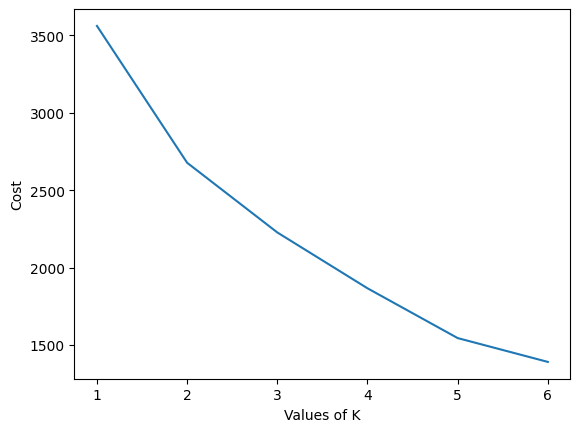

In [30]:
cost = []
for num_clusters in list(range(1,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X, categorical=[4,5,6])
    cost.append(kproto.cost_)
 
plt.plot(range(1,7) , cost)
plt.xlabel("Values of K")
plt.ylabel("Cost") 
plt.show()

Calculate the purity of the k-prototypes clusters for k=2 and k=3

In [31]:
# Perform clustering with 2 clusters
avg = np.zeros(10)
for i in range(10):
    kproto = KPrototypes(n_clusters=2, init='Cao')
    clusters = kproto.fit_predict(X, categorical=[4,5,6])

    # Compute purity
    purity = compute_purity(clusters, y)
    avg[i] = purity

print('Purity k=2:', np.mean(avg))

# Perform clustering with 3 clusters
avg = np.zeros(10)
for i in range(10):
    kproto = KPrototypes(n_clusters=3, init='Cao')
    clusters = kproto.fit_predict(X, categorical=[4,5,6])

    # Compute purity
    purity = compute_purity(clusters, y)
    avg[i] = purity

print('Purity k=3:', np.mean(avg))


Purity k=2: 0.6024358974358973
Purity k=3: 0.632948717948718


Preparing the data for k-means by dropping categorical data

In [32]:
X = X.drop(['Class', 'Sex', 'Embarked'], axis=1)

Getting the optimal k by using silhouette score

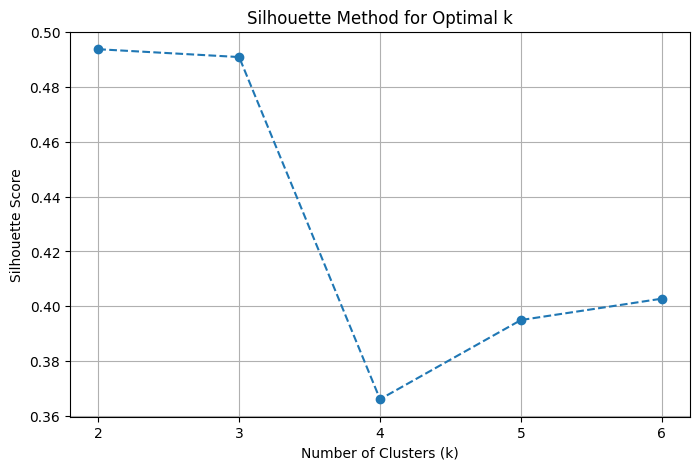

In [33]:
# Range of k values to try
k_values = range(2, 7)

# Store silhouette scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.title('Silhouette Method for Optimal k')
plt.grid()
plt.show()

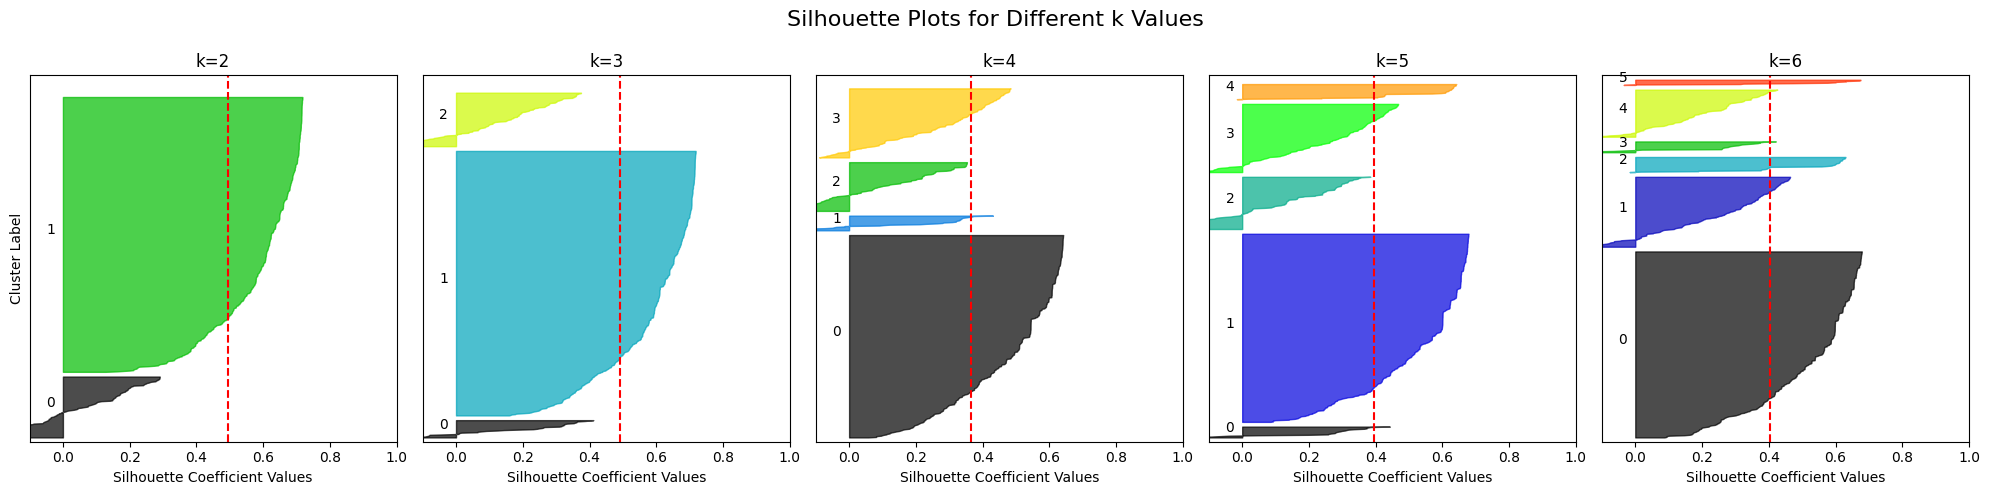

In [34]:
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5), sharey=True)
fig.suptitle("Silhouette Plots for Different k Values", fontsize=16)

# Loop through k values and create silhouette plots
for ax, k in zip(axes, k_values):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Get silhouette values for the current cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette plot for the cluster
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Add cluster labels
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    # Draw the average silhouette score line
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette Coefficient Values")
    if k == 2:
        ax.set_ylabel("Cluster Label")
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Calculate the purity of the k-means clusters for k=4 and k=5

In [35]:
# Fit the kMeans model with 4 clusters
avg = np.zeros(10)
for e in range(10):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Purity
    purity = compute_purity(y_kmeans, y)
    avg[e] = purity

print(f"Purity n=4: {avg.mean()}")


# Fit the kMeans model with 5 clusters
avg = np.zeros(10)
for e in range(10):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Purity
    purity = compute_purity(y_kmeans, y)
    avg[e] = purity

print(f"Purity n=5: {avg.mean()}")

Purity n=4: 0.6158974358974358
Purity n=5: 0.6237179487179487
